In [173]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [107]:
file = Path('crypto_data.csv')

In [108]:
cryptodf = pd.read_csv(file, index_col=0)
cryptodf.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [109]:
# List all algorithms in use


# Alist = (cryptodf.Algorithm.values)
# print(Alist)


In [110]:
# List all algorithms in use


Alist = set(cryptodf.Algorithm.values)
print(Alist)

{'Rainforest', 'CryptoNight-lite', 'Cloverhash', 'HybridScryptHash256', 'Blake2b', 'Slatechain', 'XG Hash', 'Green Protocol', 'NeoScrypt', 'HMQ1725', 'ScryptOG', 'Avesta hash', 'BLAKE256', 'T-Inside', 'Momentum', 'Lyra2Z', 'Wild Keccak', 'YescryptR16', 'Ouroboros', 'X15', 'vDPOS', 'M00N', 'DPoS', 'QuBit', 'M7 POW', 'NIST5', 'CryptoNight-V7', 'POS 2.0', 'Curve25519', 'PHI2', 'SHA-256', 'Ethash', 'PHI1612', 'Keccak', 'QUAIT', 'POS 3.0', 'Skein', 'Counterparty', 'Exosis', 'SkunkHash v2 Raptor', 'Equihash+Scrypt', 'Semux BFT consensus', 'Blake', 'Cryptonight-GPU', 'ECC 256K1', 'Scrypt', 'Equihash', 'Multiple', 'Progressive-n', 'XEVAN', 'Proof-of-Authority', 'Scrypt-n', 'X16R', '1GB AES Pattern Search', 'SkunkHash', 'X11', 'Quark', 'Time Travel', 'CryptoNight', 'IMesh', 'Proof-of-BibleHash', '536', 'Dagger', 'SHA-512', 'X16S', 'CryptoNight-Lite', 'Groestl', 'Stanford Folding', 'VBFT', 'X13', 'QuarkTX', 'TRC10', 'X11GOST', 'Argon2', 'SHA3-256', 'Blake2S', 'CryptoNight Heavy X', 'Jump Consist

In [111]:
# print the counts of stocks being currently traded vs. not being currently traded 

cryptodf["IsTrading"].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [112]:
# Select only cryptocurrencies that are being traded

cryptodf = cryptodf.loc[cryptodf["IsTrading"]==True]

cryptodf.head()



,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [113]:
# Delete the IsTrading column; it is no longer necessary

crypto_final = cryptodf.drop("IsTrading", axis=1)

crypto_final.head()



,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [114]:
# Delete all rows with null values

crypto_final = crypto_final.dropna(axis=0, how='any')

crypto_final

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [115]:
# Sort values in TotalCoinsMined to identify negative or zero values

crypto_final.TotalCoinsMined.sort_values()



FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [116]:
# Select only rows with positive TotalCoinsMined values

crypto_final = crypto_final[crypto_final["TotalCoinsMined"]>0]

len(crypto_final)



532

In [117]:
# Delete the CoinName column from the original dataframe

crypto_final = crypto_final.drop("CoinName", axis=1)
crypto_final.head()


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [133]:
# Create dummy variables for columns with string values

X = pd.get_dummies(data=crypto_final, columns=["Algorithm", "ProofType"])


X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

SC = StandardScaler()

X_scaled = scaler.fit_transform(X)




In [136]:
# print the scaled data


X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [137]:
# Identify the numbers of rows and columns in the scaled data
X_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [139]:
#Reduce dimensions with PCA

PC = PCA(n_components=0.90)
PrinC = PC.fit_transform(X_scaled)
PrinC.shape

(532, 74)

In [140]:
#The sum of the explained variance of the principal components


PC.explained_variance_.sum()

88.4728345756615

In [141]:
# Reduce dimensions with t-SNE

tn = TSNE(perplexity=50)
tn_feat = tn.fit_transform(PrinC)
tn_feat.shape

(532, 2)

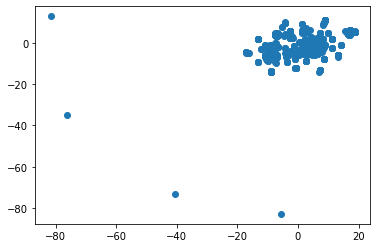

In [171]:
# Plot t-SNE output

x = tn_feat[:,0]
y = tn_feat[:,1]

plt.scatter(x,y)
plt.show()



In [172]:
# Identify clusters with k-means




# clstr = []

# for i in range (1,10):
#     kmeans = KMeans(n_clusters=i , random_state=0)
#     kmeans.fit(PrinC)
#     clstr.append(kmeans.inertia_)

clstr = []
k = [1,2,3,4,5,6,7,8,9,10]

for value in k:
    kmeans = KMeans(n_clusters= value , random_state=0)
    kmeans.fit(PrinC)
    clstr.append(kmeans.inertia_)



C:\Users\nashl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


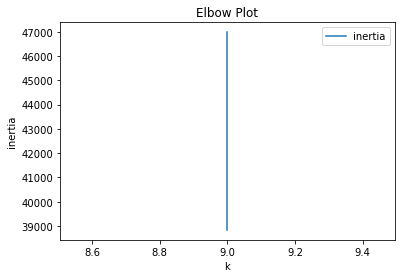

In [169]:
# Create an elbow plot

bowplt = pd.DataFrame({"K":i,"inertia":clstr})
bowplt.plot.line(x = 'K', y="inertia")
plt.ylabel("inertia")
plt.xlabel("k")
plt.title("Elbow Plot")
plt.show()
                 
                 
                 


Based on the plots, crypto currency doesn't have significant clusters. 